0.95
Early stopping at epoch 80


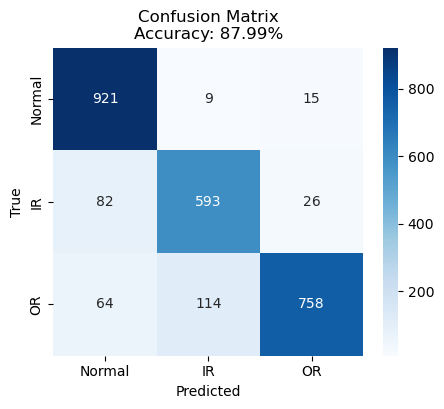

 - Model accuracy: 87.99%


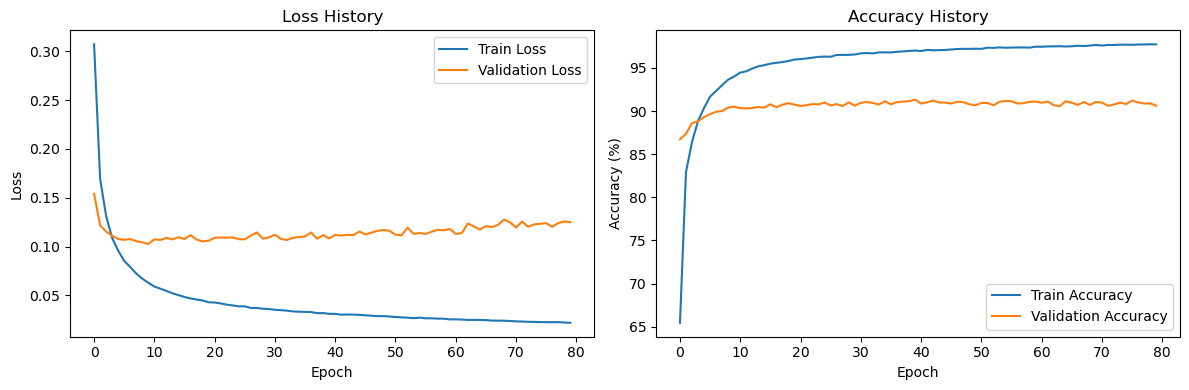

0.95
Early stopping at epoch 139


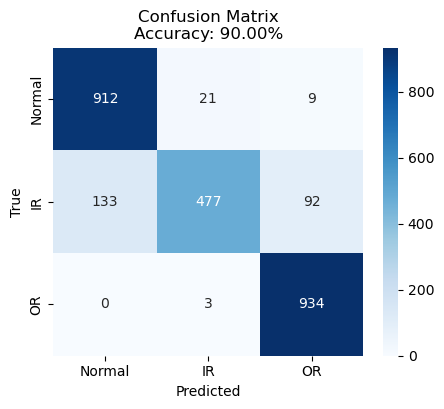

 - Model accuracy: 90.00%


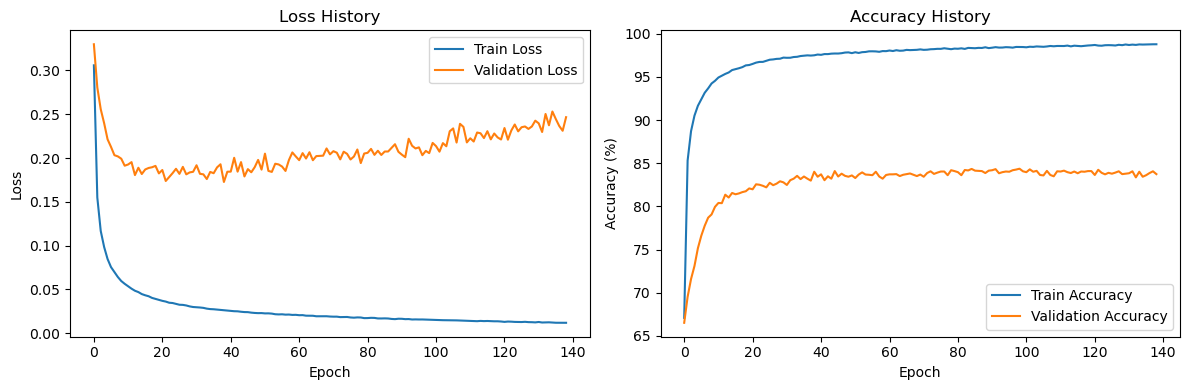

0.95
Early stopping at epoch 111


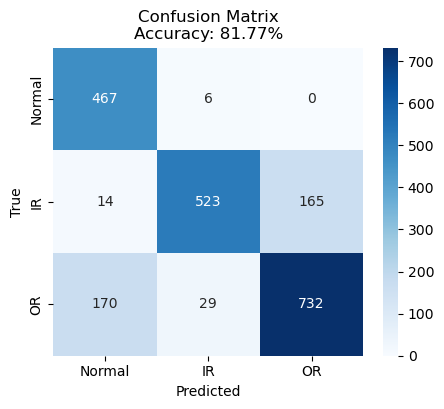

 - Model accuracy: 81.77%


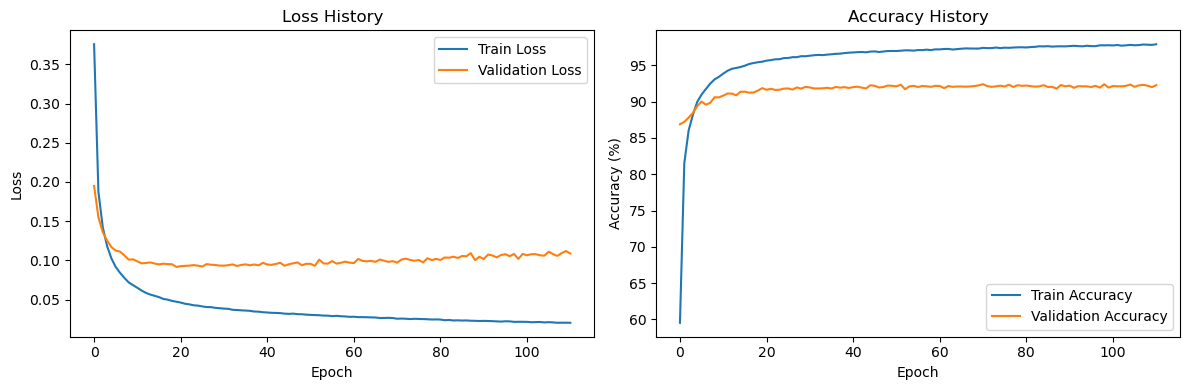

0.95
Early stopping at epoch 86


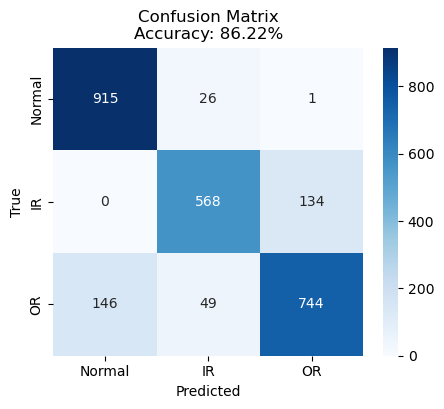

 - Model accuracy: 86.22%


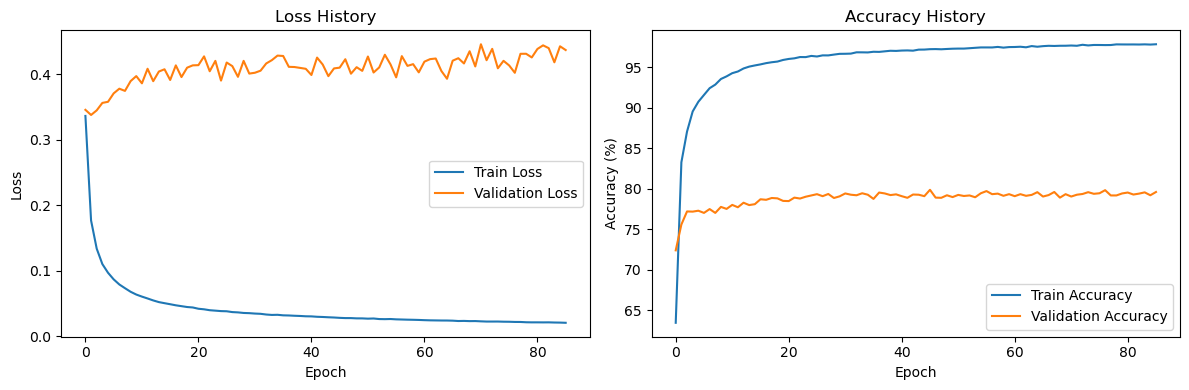

0.95
Early stopping at epoch 127


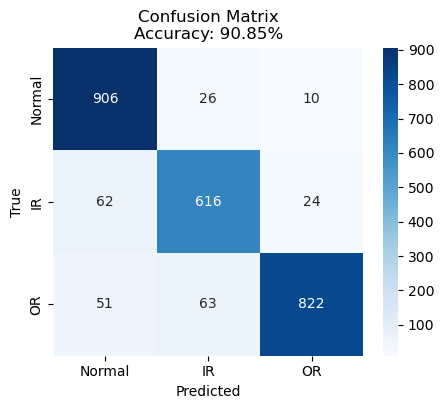

 - Model accuracy: 90.85%


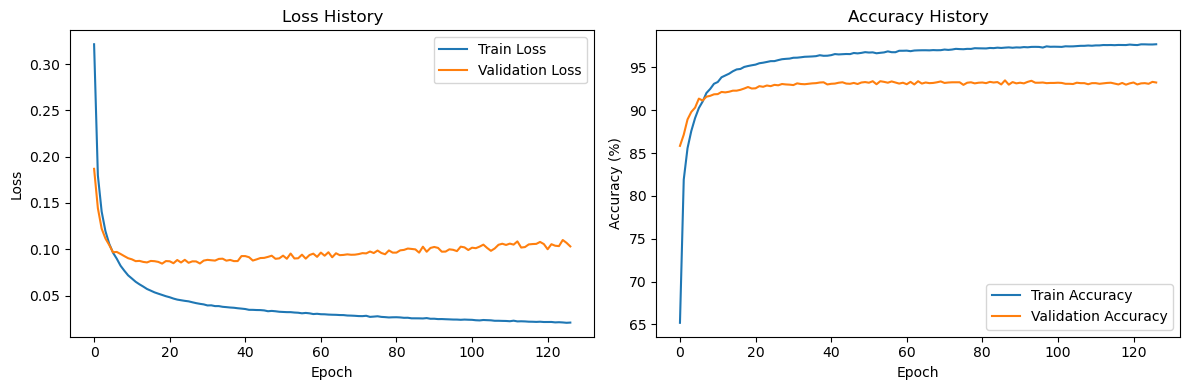

0.95
Early stopping at epoch 112


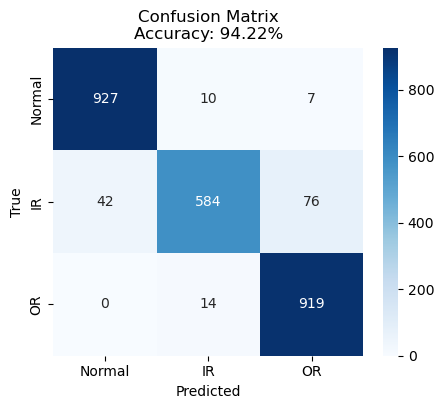

 - Model accuracy: 94.22%


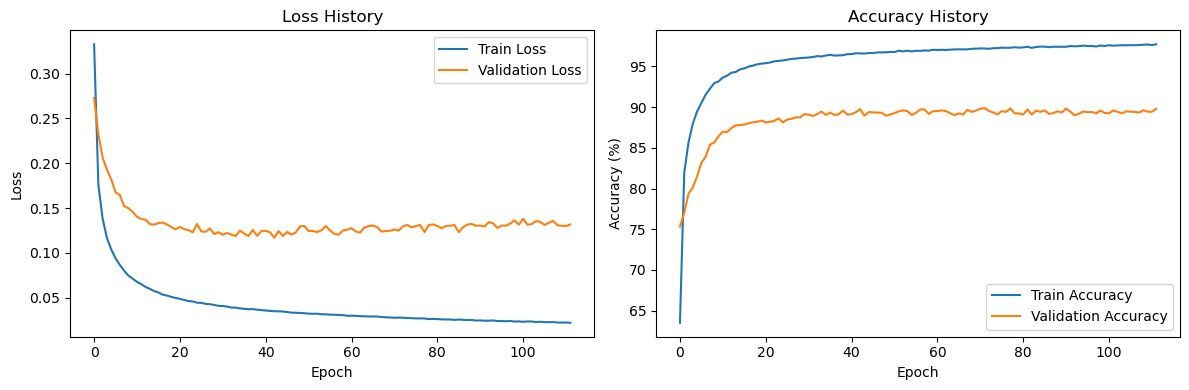

0.95
Early stopping at epoch 304


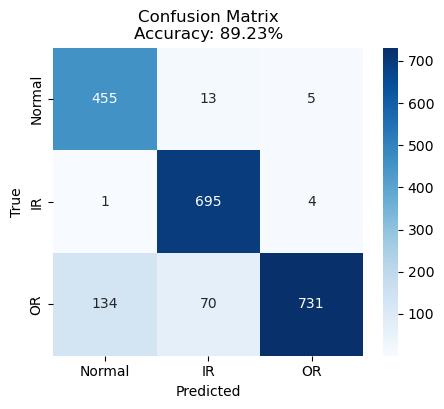

 - Model accuracy: 89.23%


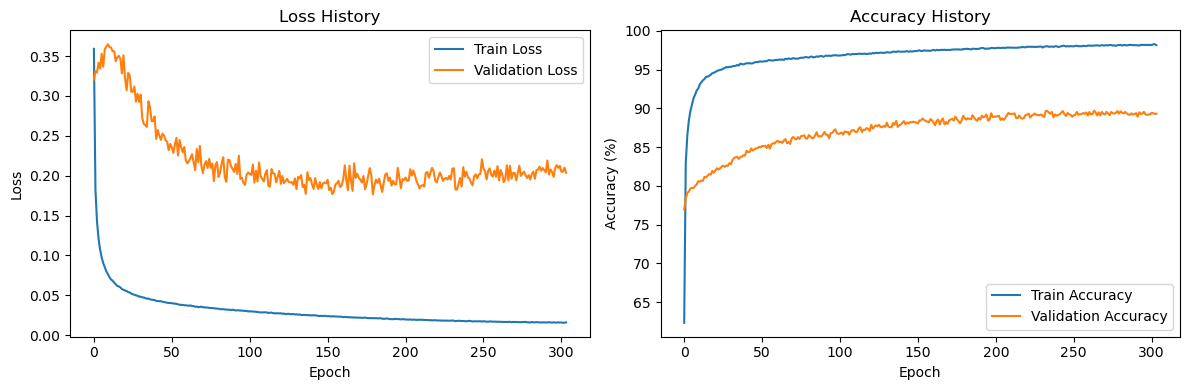

0.95
Early stopping at epoch 117


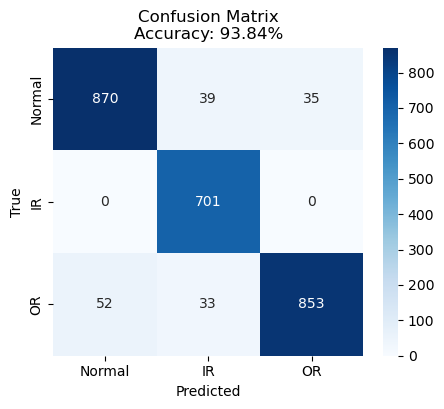

 - Model accuracy: 93.84%


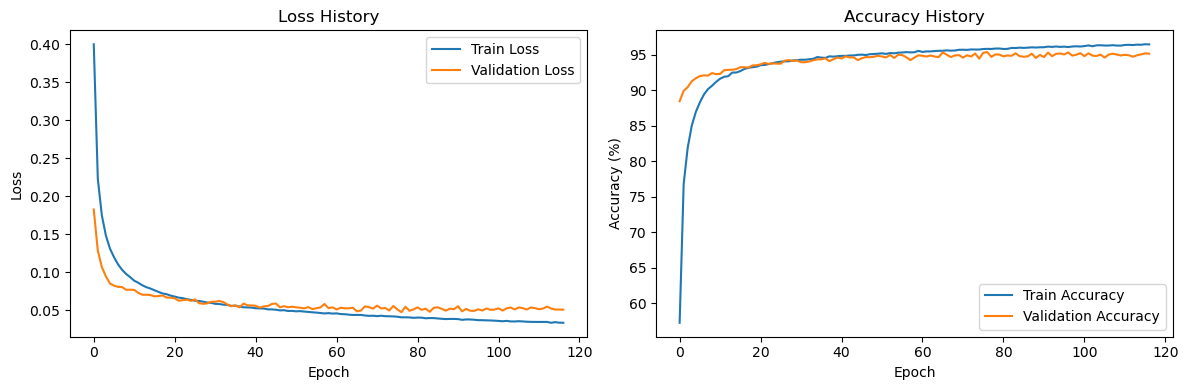

0.95
Early stopping at epoch 160


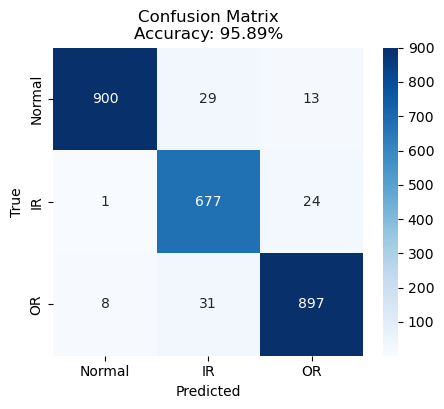

 - Model accuracy: 95.89%


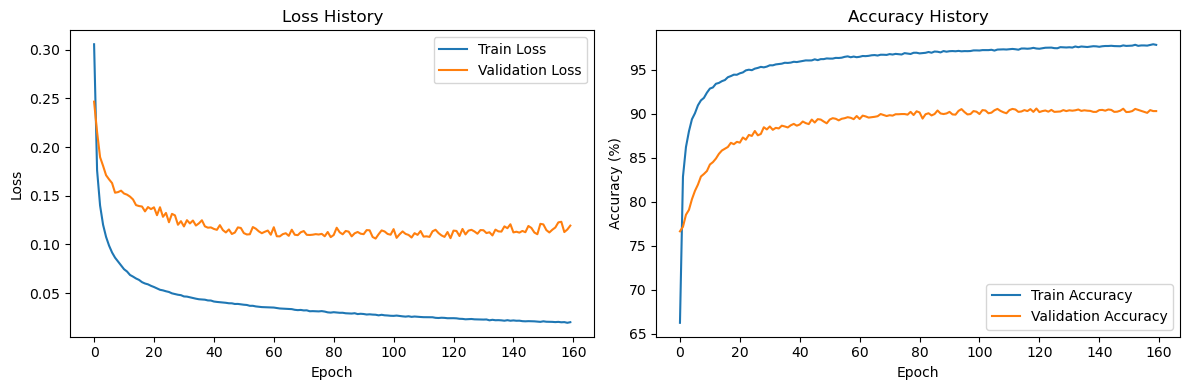

0.95
Early stopping at epoch 114


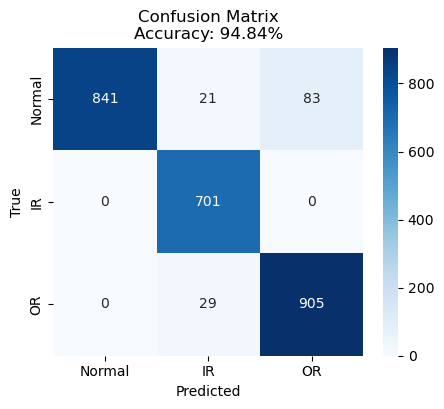

 - Model accuracy: 94.84%


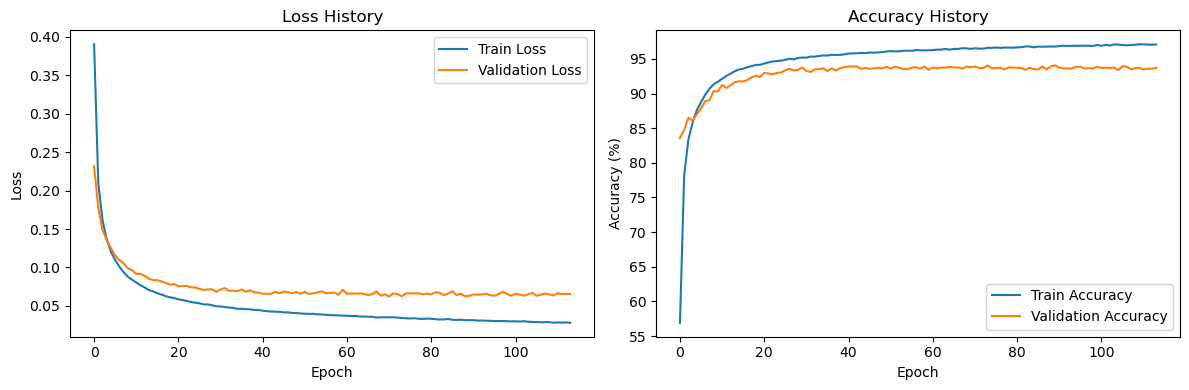

0.95
Early stopping at epoch 143


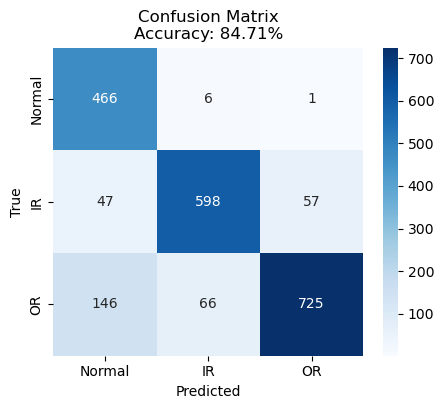

 - Model accuracy: 84.71%


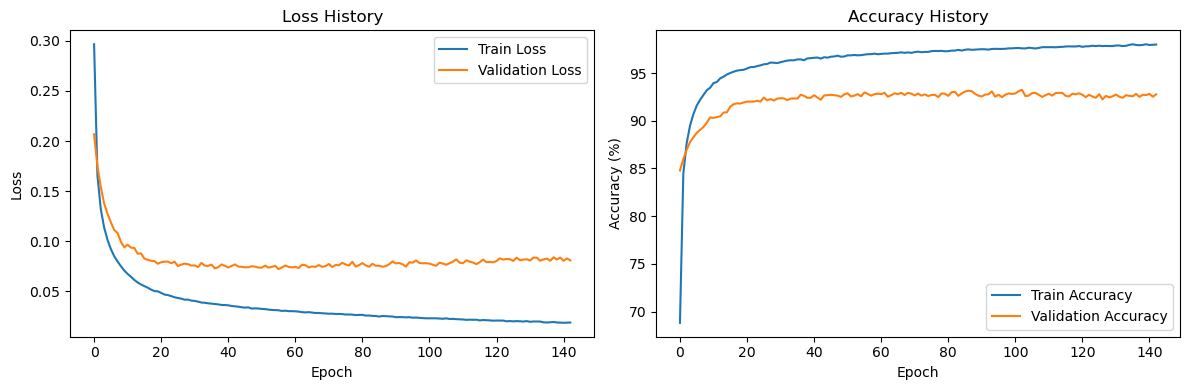

0.95
Early stopping at epoch 68


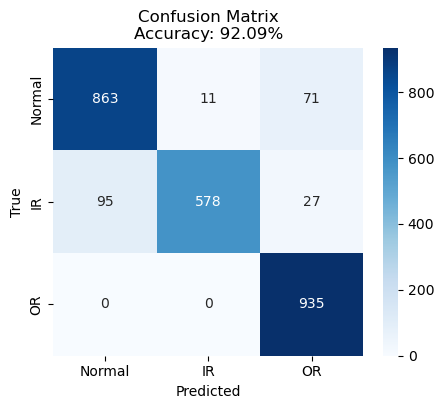

 - Model accuracy: 92.09%


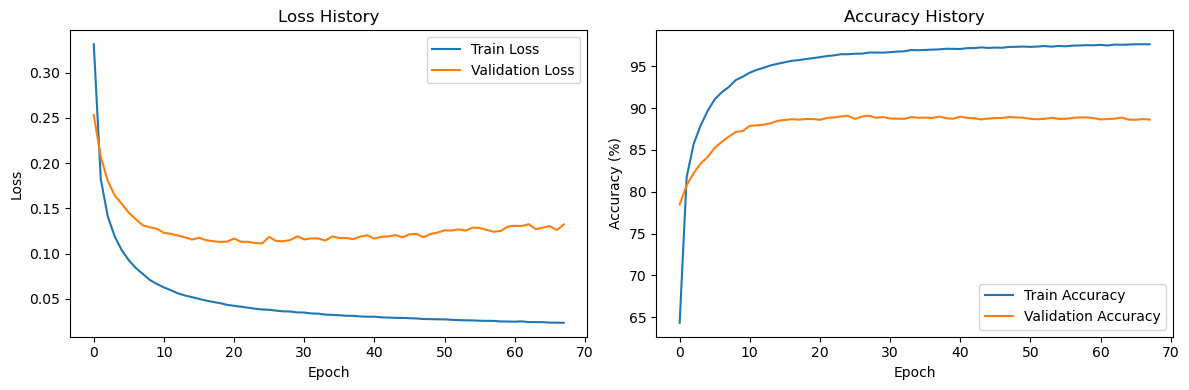

0.95
Early stopping at epoch 113


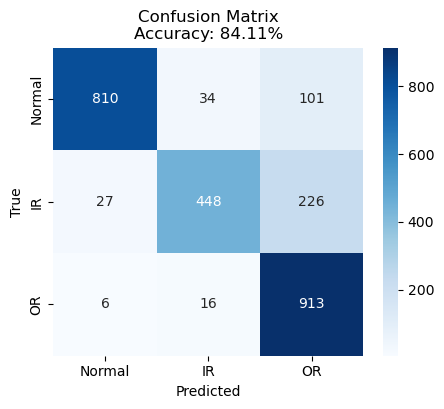

 - Model accuracy: 84.11%


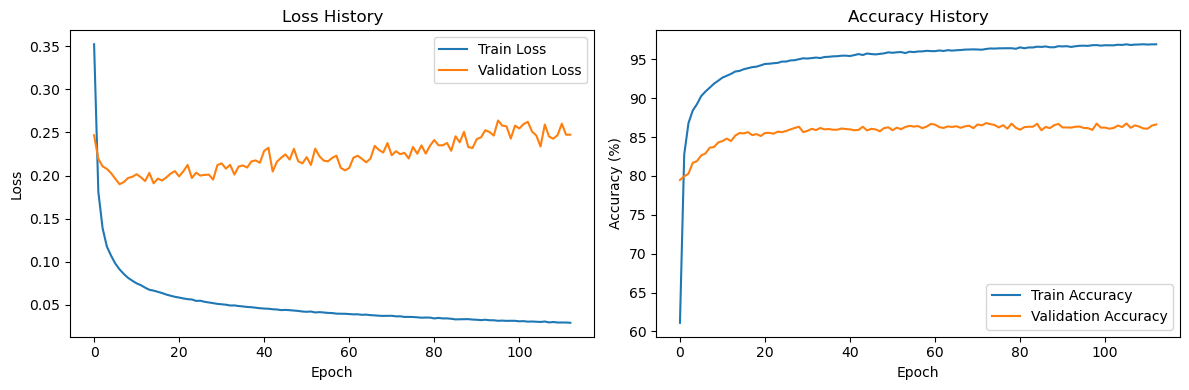

0.95
Early stopping at epoch 156


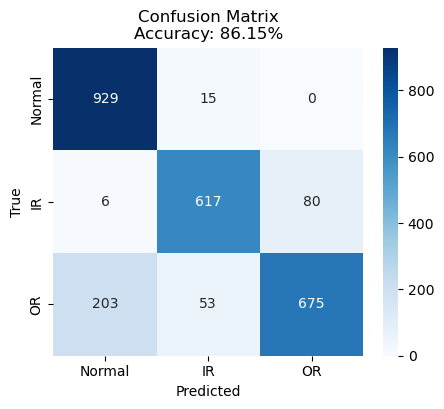

 - Model accuracy: 86.15%


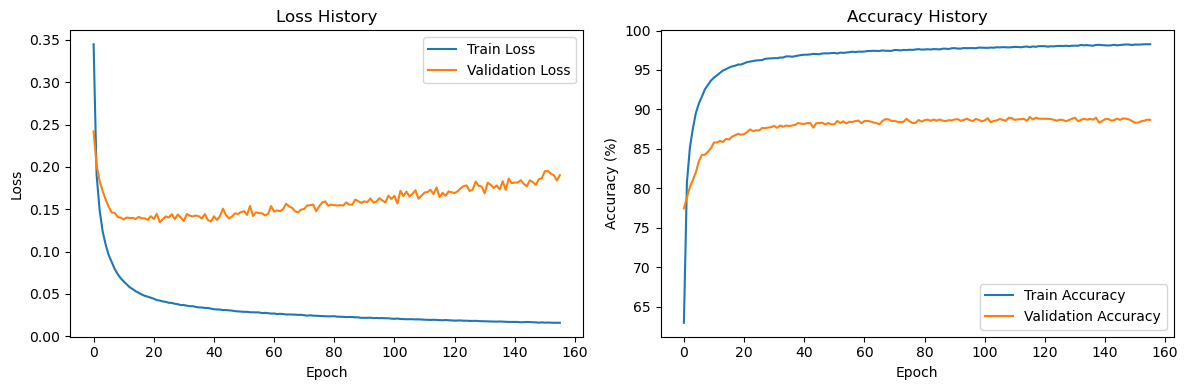

0.95
Early stopping at epoch 143


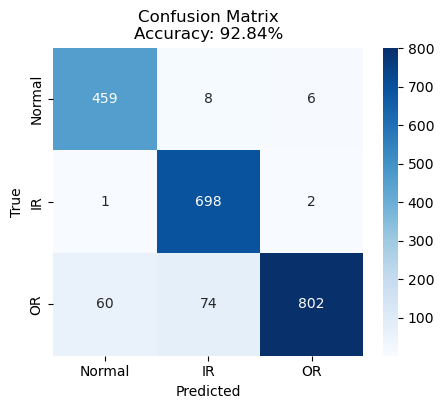

 - Model accuracy: 92.84%


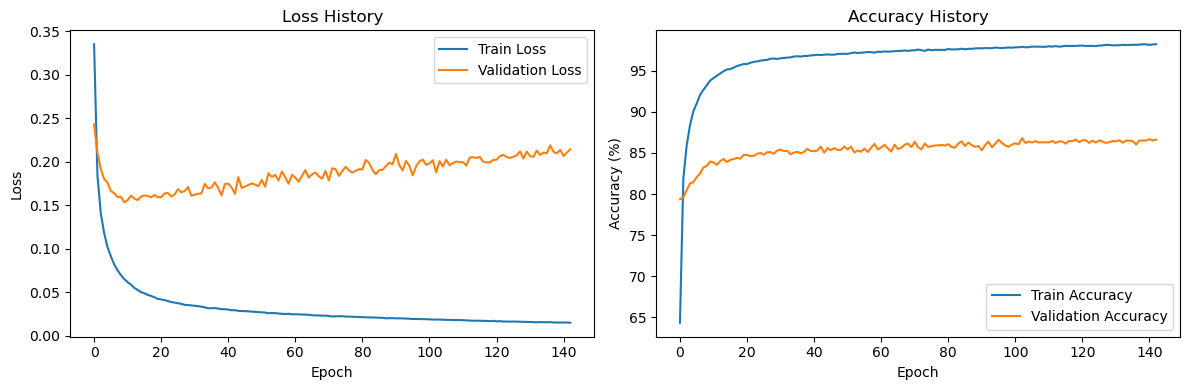

0.95
Early stopping at epoch 101


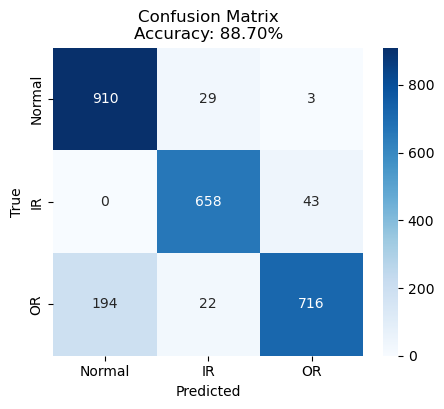

 - Model accuracy: 88.70%


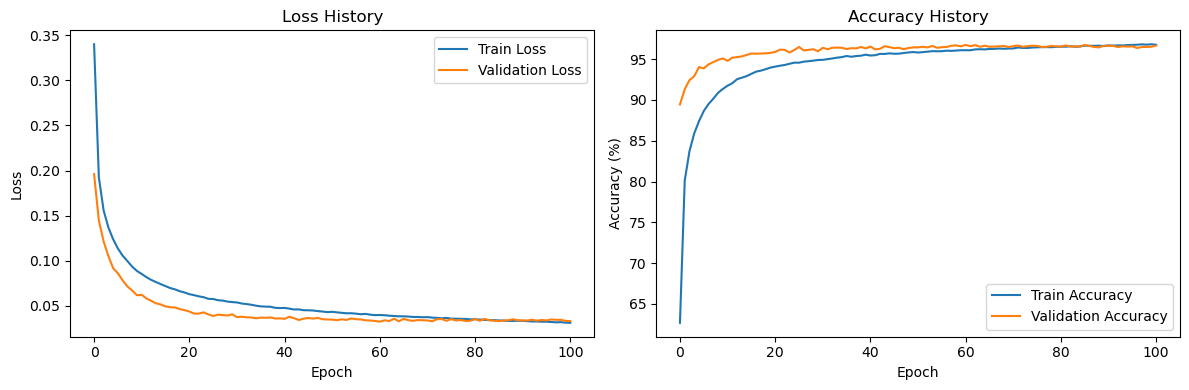

0.95
Early stopping at epoch 97


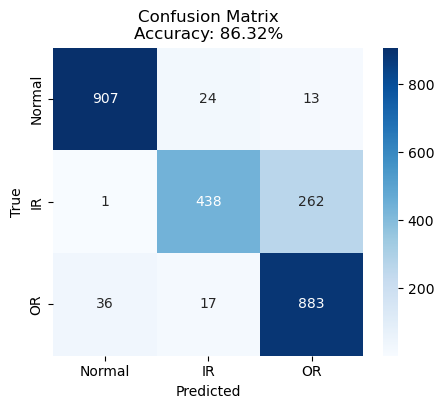

 - Model accuracy: 86.32%


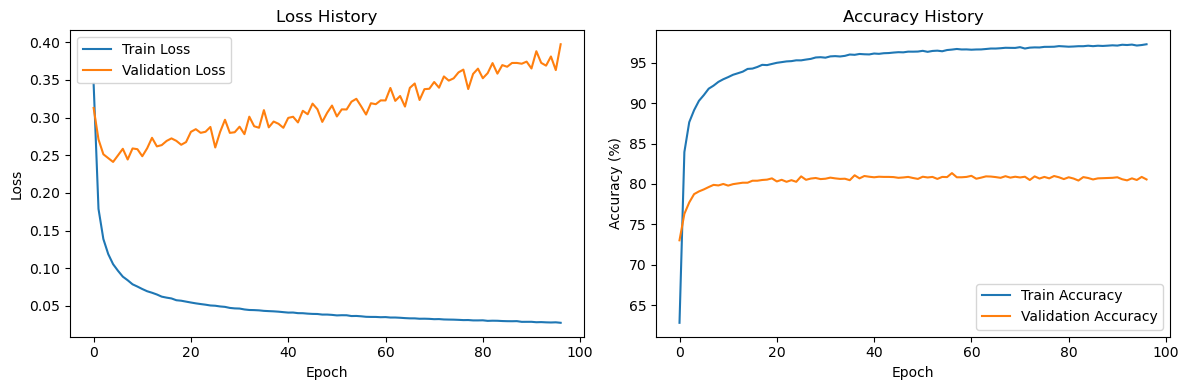

0.95
Early stopping at epoch 157


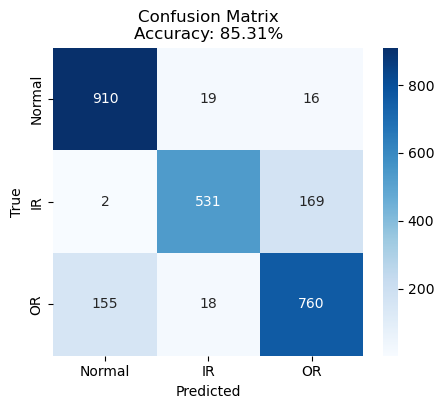

 - Model accuracy: 85.31%


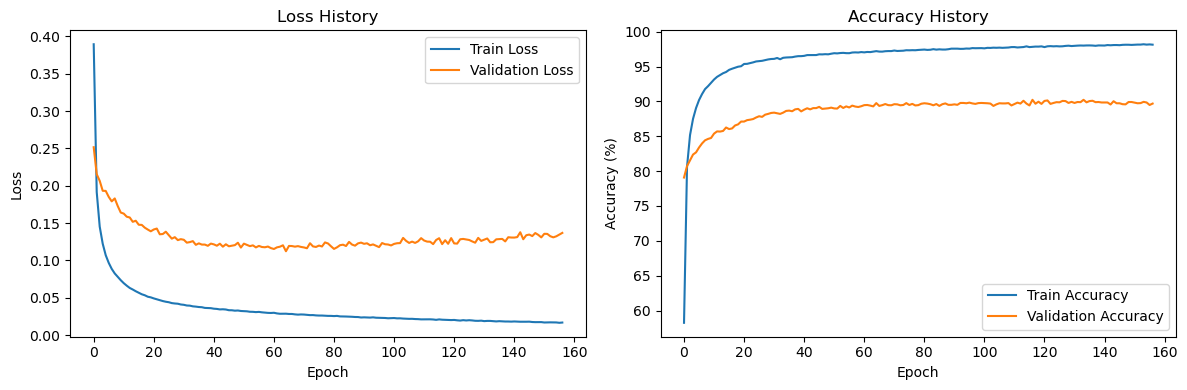

0.95
Early stopping at epoch 156


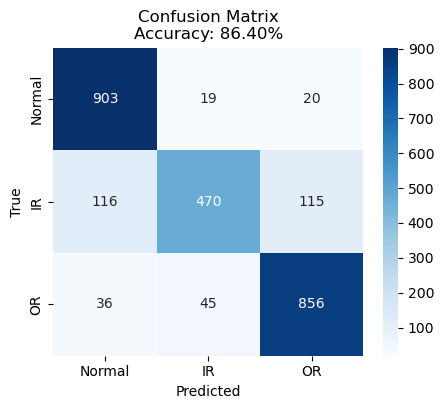

 - Model accuracy: 86.40%


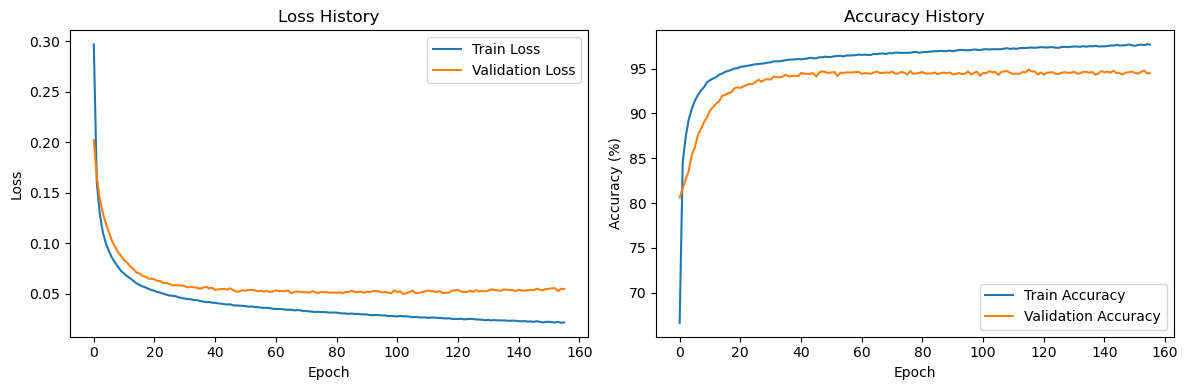

0.95
Early stopping at epoch 132


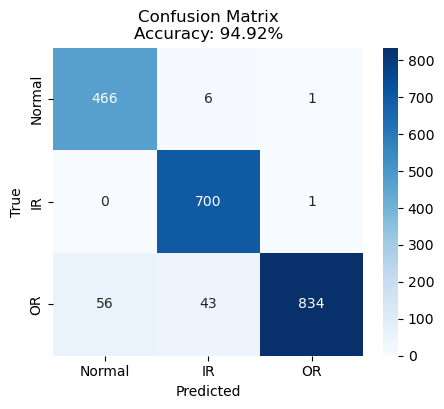

 - Model accuracy: 94.92%


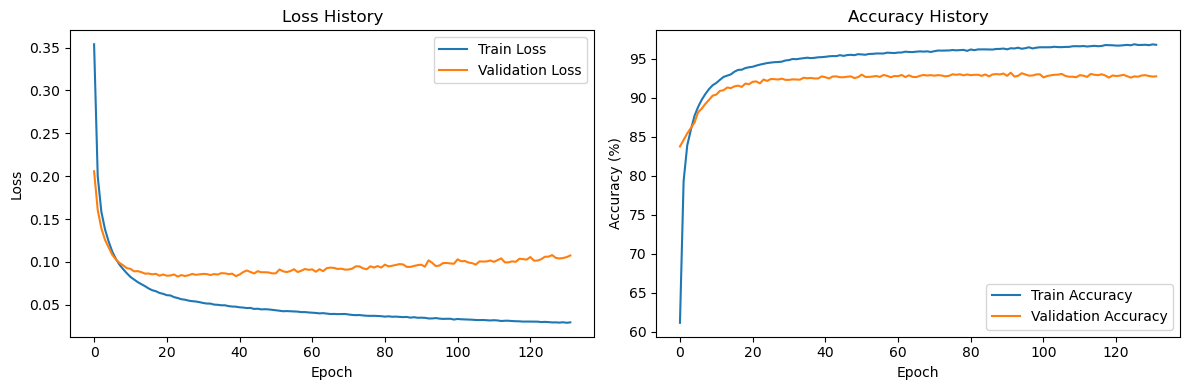

0.95
Early stopping at epoch 95


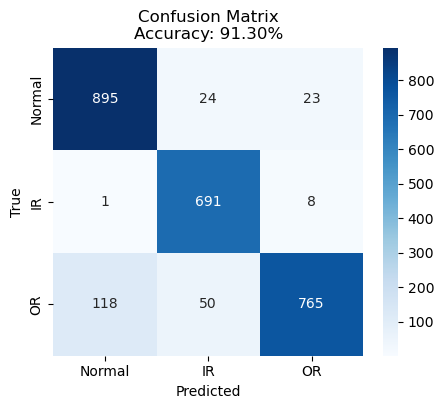

 - Model accuracy: 91.30%


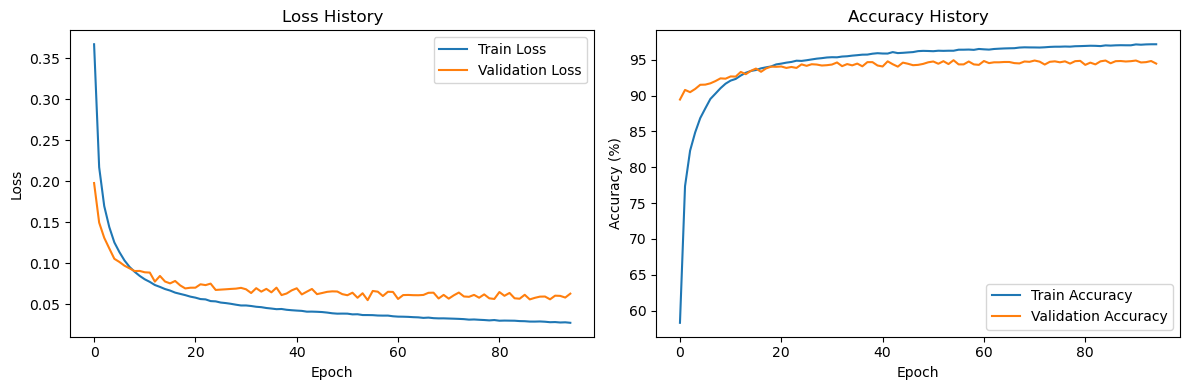

0.95
Early stopping at epoch 86


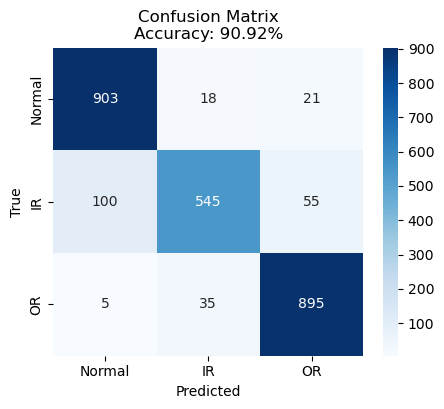

 - Model accuracy: 90.92%


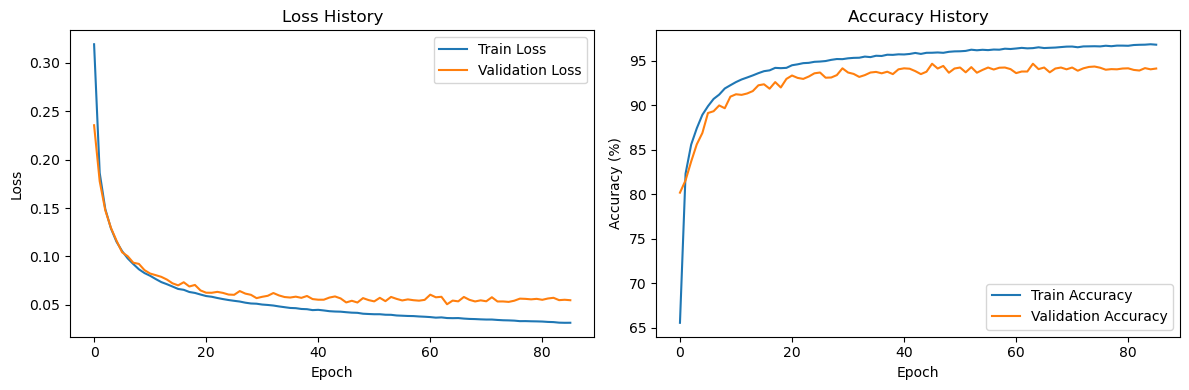

0.95
Early stopping at epoch 113


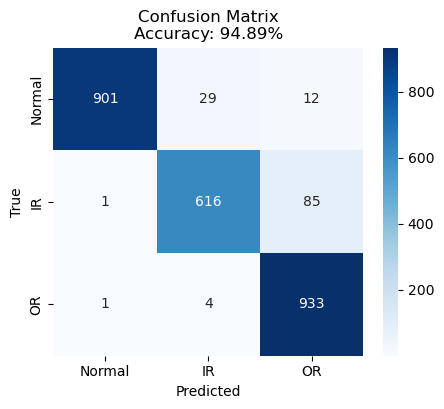

 - Model accuracy: 94.89%


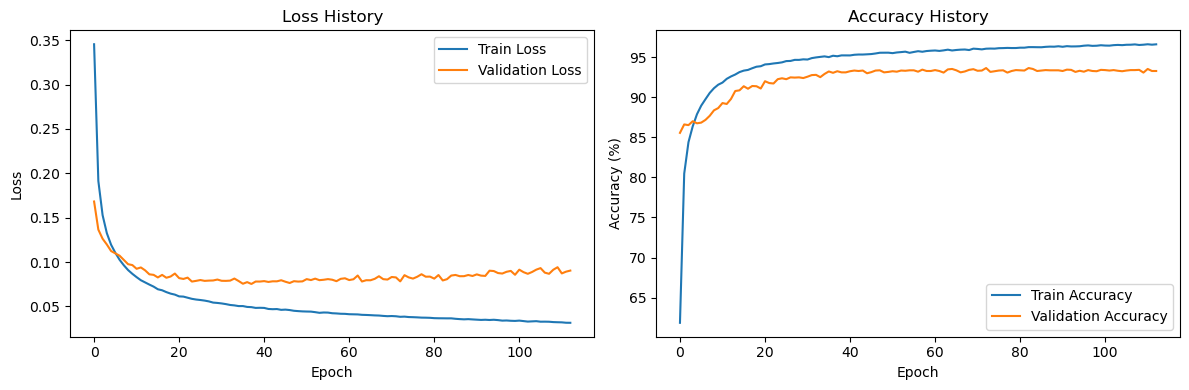

0.95
Early stopping at epoch 173


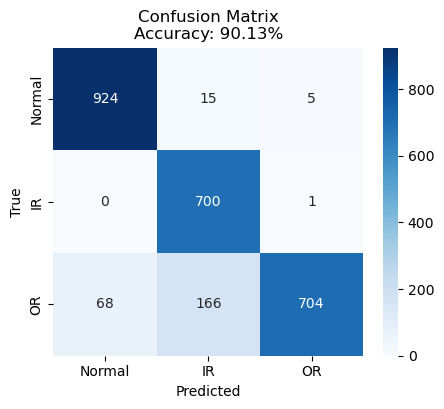

 - Model accuracy: 90.13%


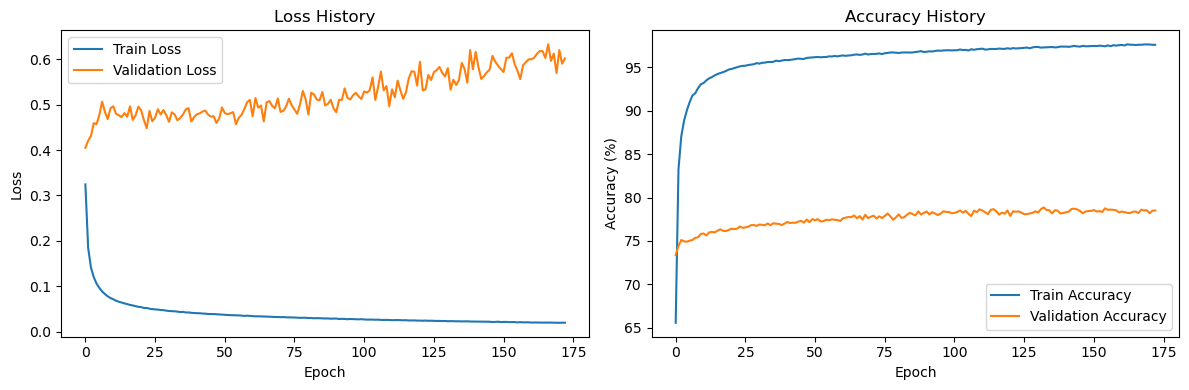

0.95
Early stopping at epoch 102


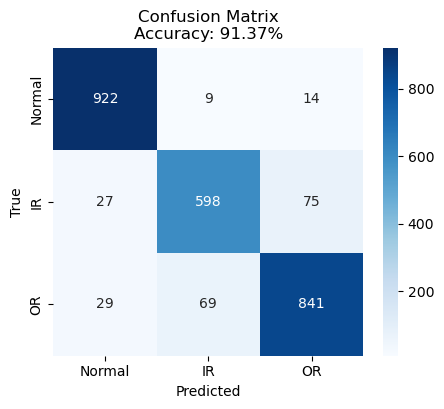

 - Model accuracy: 91.37%


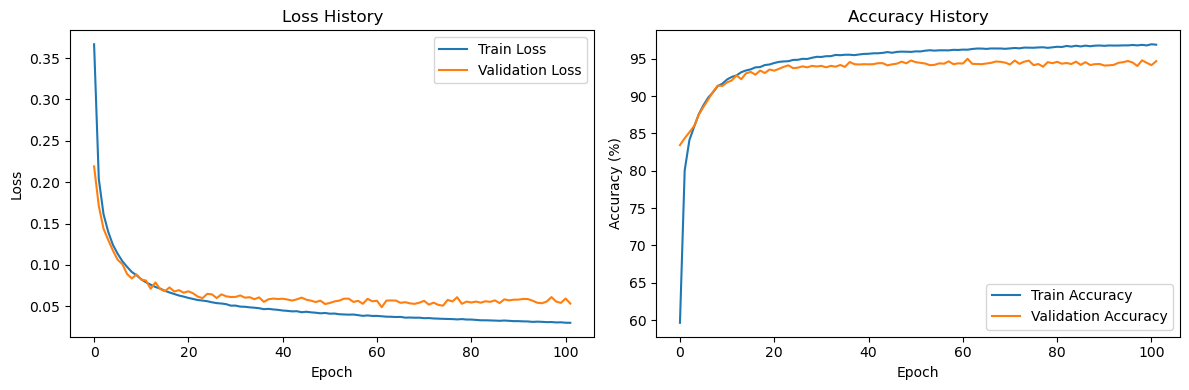

0.95
Early stopping at epoch 104


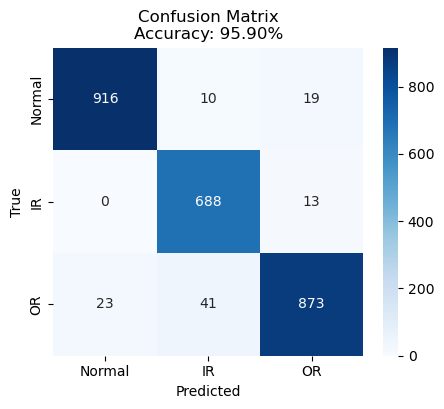

 - Model accuracy: 95.90%


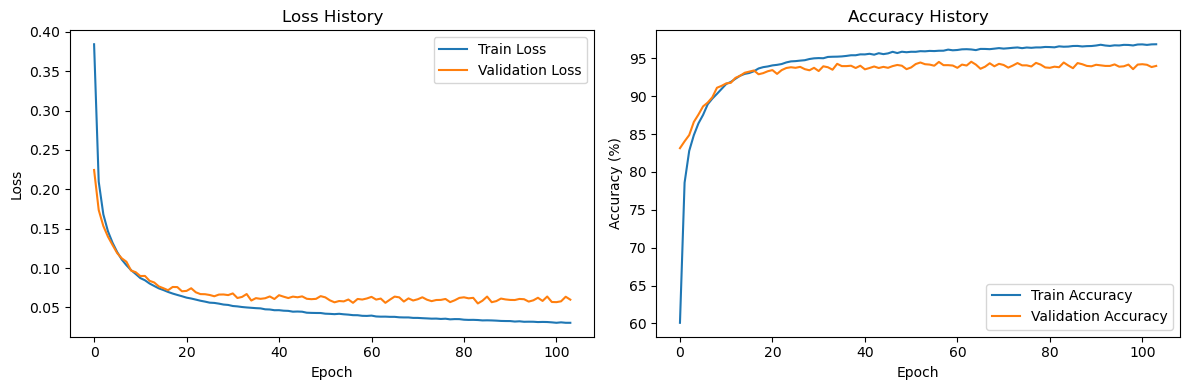

0.95
Early stopping at epoch 96


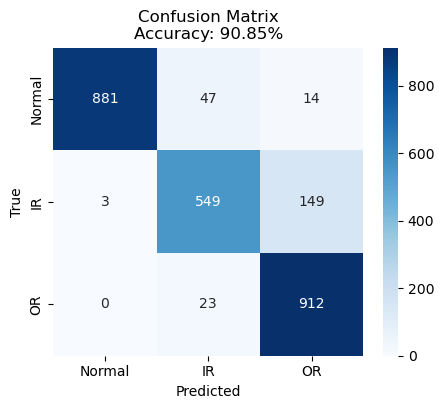

 - Model accuracy: 90.85%


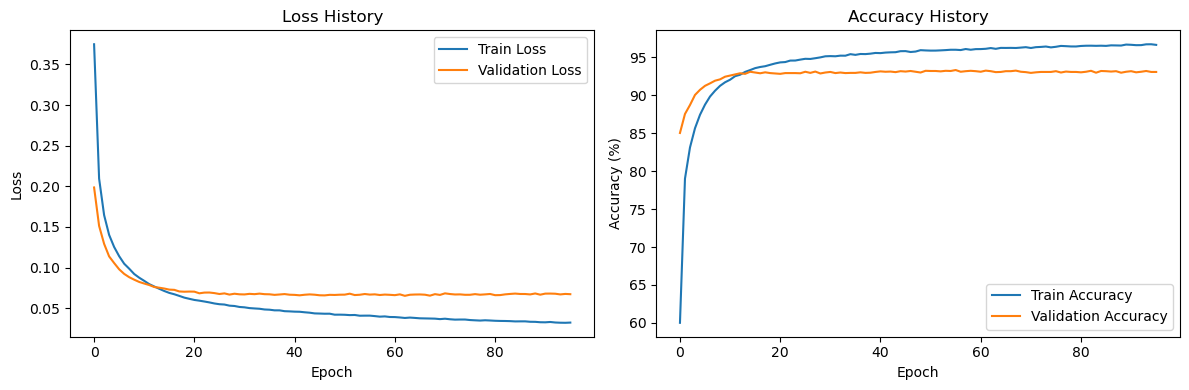

0.95
Early stopping at epoch 139


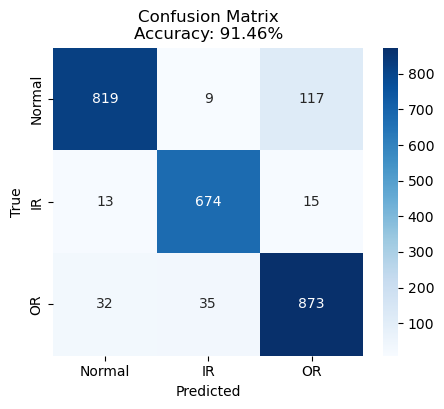

 - Model accuracy: 91.46%


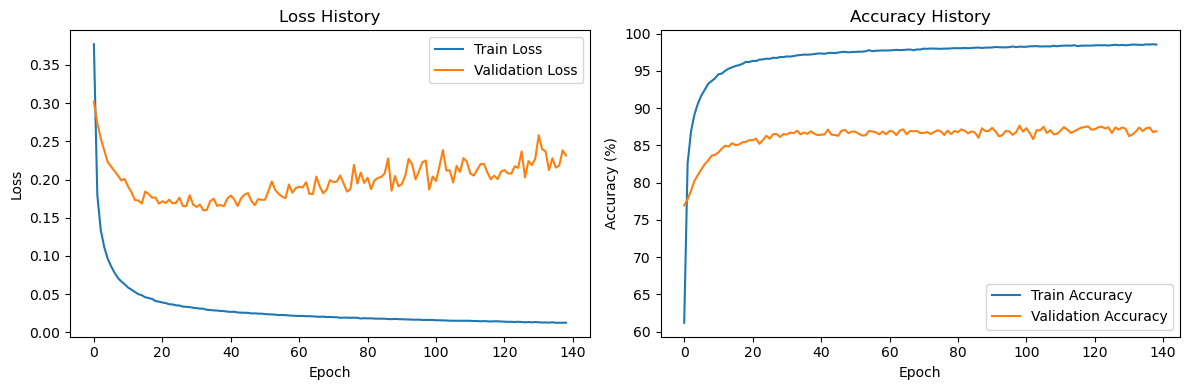

0.95
Early stopping at epoch 128


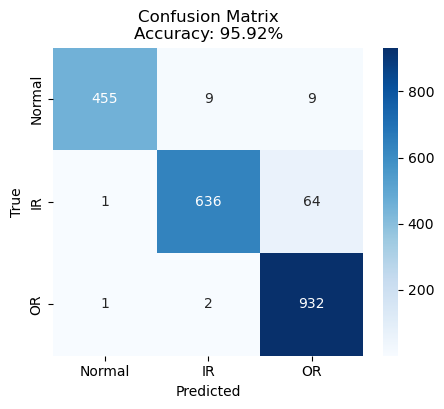

 - Model accuracy: 95.92%


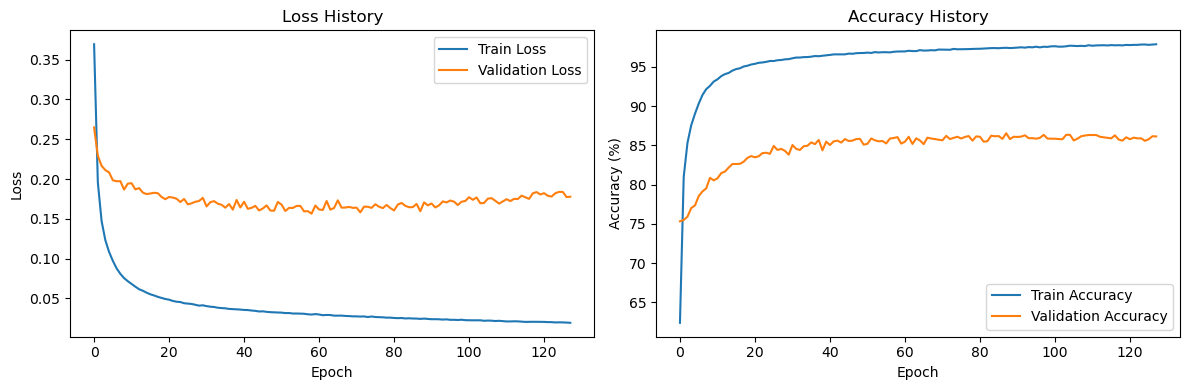

0.95
Early stopping at epoch 123


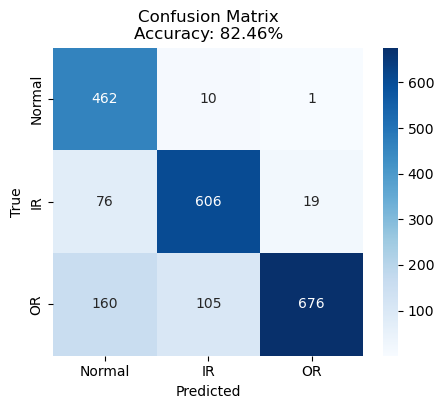

 - Model accuracy: 82.46%


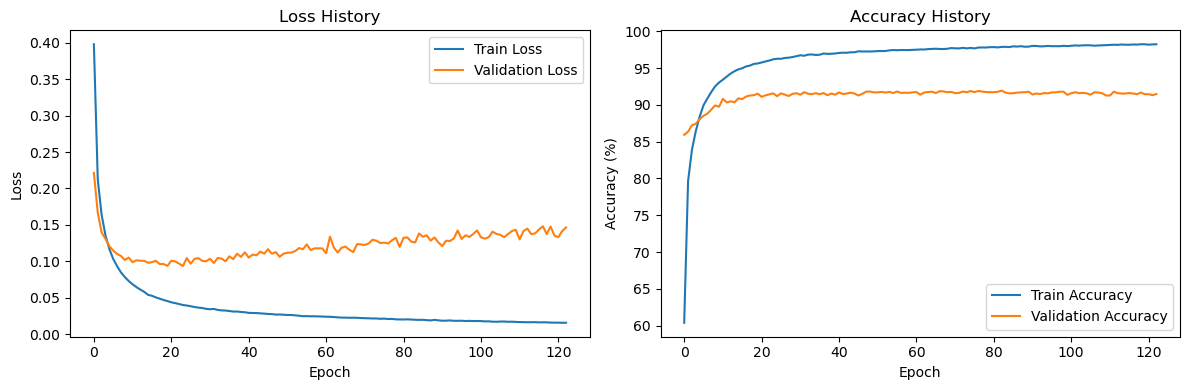

Mean accuracy: 0.9005381225183979
Std accuracy: 0.04084008589234071


In [2]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch

accuracy_list = []

class FocalLoss(nn.Module):
    #def __init__(self, alpha=1, gamma=2, reduction='mean'):
    def __init__(self, gamma=2, reduction='mean'):
        super().__init__()
        #self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss =(1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        return focal_loss

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = FocalLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))